- NOTE!: HERE We ASSUME that the datasets contains already S21, NOT the output power. We keep track of input power in each the dataset name.

Libraries and functions found on web to display content of a .h5 file

In [ ]:
import h5py
import numpy as np
from h5utils import *
import matplotlib.pyplot as plt

In [2]:
filename = "Test_Ciclo_freq.h5";   # Change HERE!!!

Here you can see the content of the file

In [ ]:
"""PRINT ALL the .h5 file directories"""
h5dump(filename,group = "/")

In [3]:
"""Get simulation parameters"""
params_names, params_values = getDatasetValue(filename,"/",0)

# Print [Check if the order of paramerers is the same of the assegnation below!]
for i in np.arange(0,len(params_names)):
    print(str(params_names[i].decode("utf-8")),": ",str(params_values[i].decode("utf-8")))

# Vna
powerdBm = params_values[0] #[dBm]
navgs = params_values[3]
# Pump
freq_start = float(params_values[1])/1e9 #[GHz]
freq_stop = float(params_values[2])/1e9 #[Ghz]
ampl_min = float(params_values[3]) #[dBm]
ampl_max = float(params_values[4]) #[dBm]
# Bias
volt_min = float(params_values[5]) #[V]
volt_max = float(params_values[6]) #[V]
# You could retrieve current from resistance

# Points densities
n_freq = int(params_values[7])
n_ampl = int(params_values[8])
n_volt = int(params_values[9])

freqs = np.linspace(freq_start, freq_stop, n_freq) 
ampls = np.linspace(ampl_min, ampl_max, n_ampl)
volts = np.linspace(volt_min, volt_max, n_volt)

powerdBm :  -15
freq_start :  10000000000.0
freq_stop :  20000000000.0
ampl_min :  -20
ampl_max :  -20
volt_min :  0.1509
volt_max :  0.1509
n_freq :  10
n_ampl :  1
n_volt :  1
navgs :  3


In [4]:
"""Print parameters arrays"""

temp_str = ""
volt_cifers = 3
for i in np.arange(0,n_volt):
    temp_str = temp_str + "[" + str(i) + "] " + str(round(volts[i], volt_cifers)) + "; "
print("Bias Voltage (V): ",temp_str)

temp_str = ""
freq_cifers = 3
for i in np.arange(0,n_freq):
    temp_str = temp_str + "[" + str(i) + "] " + str(round(freqs[i], freq_cifers)) + "; "
print("Pump frequency (GHz): ",temp_str)

temp_str = ""
ampl_cifers = 3
for i in np.arange(0,n_ampl):
    temp_str = temp_str + "[" + str(i) + "] " + str(round(ampls[i], ampl_cifers)) + "; "
print("Pump power (dBm): ",temp_str)

Bias Voltage (V):  [0] 0.151; 
Pump frequency (GHz):  [0] 10.0; [1] 11.111; [2] 12.222; [3] 13.333; [4] 14.444; [5] 15.556; [6] 16.667; [7] 17.778; [8] 18.889; [9] 20.0; 
Pump power (dBm):  [0] -20.0; 


Simulation parameters: 
Bias voltage:  0.151  V
Pump frequency:  11.111  GHz
Pump power:  -20.0 dBm



Invalid frequency span; Select
xmin >  2.0  x  1000000000.0 
xmax < 10.0  x  1000000000.0 



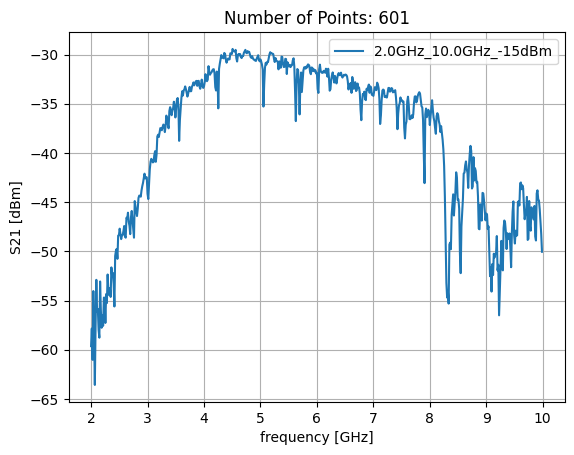

In [5]:
"""Plot (and get) a specific measure"""
dc_volt_index = 0
pump_freq_index = 1
pump_pow_index = 0


group = "/dc_" + str(dc_volt_index) + "/pumpfreq_" + str(pump_freq_index) + "/pumppow_" + str(pump_pow_index)

fmin = 15e9
fmax = 16e9

print("Simulation parameters: ")
print("Bias voltage: ", str(round(volts[dc_volt_index], volt_cifers)), " V")
print("Pump frequency: ", str(round(freqs[pump_freq_index], freq_cifers)), " GHz")
print("Pump power: ", str(round(ampls[pump_pow_index], ampl_cifers)), "dBm")
print("\n\n")
fig, ax = plotDatasetSpectrum(filename, group, 0, fmin, fmax)
xs, ys = getDatasetValue(filename, group, 0)

In [ ]:
"""DELETE a dataset"""
full_dataset_path = "/to/delete/datasetname"
deleteDataset(filename, full_dataset_path)

In [ ]:
"""Save a dataset"""
filename_save = "save.h5"
full_dataset_path = "/group/datasetname"

mat = [xs1, ys1]
hf = h5py.File(filename_save, 'a')
hf.create_dataset(full_dataset_path, data = mat)
hf.close()